In [26]:
import numpy as np 
import pandas as pd
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords

In [4]:
import pandas as pd
df = pd.read_csv("./data/dataset.csv")
df

,Source,Review_By,Review_Date,Review_Subject,Review_Body,Review_Month,Review_Day_of_week,Review_Rating,Review_Type
0,Trip Advisor,3612,30-04-2014,To commercial,This reativly new temple was a big hindu versi...,4,4,2,NEGATIVE
1,Trip Advisor,9573519851,24-07-2015,?Amazing temple in Bangalore?,Me and my friends enjoyed a lot in ISKCON temp...,7,6,5,POSITIVE
2,Trip Advisor,???? ?,28-07-2016,A well maintained temple,Otherworldly vibrations throuout the sanctuary...,7,5,5,POSITIVE
3,Trip Advisor,????? ?,23-08-2016,Temple,"ISKCON temple is very good, located in west of...",8,3,5,POSITIVE
4,Google + HK HILL,????? Anil,27-11-2015,NaN,This is a very good place to be for all the de...,11,6,4,POSITIVE
...,...,...,...,...,...,...,...,...,...
4636,Trip Advisor,Yuvraj Agnihotri,11-12-2016,NaN,Experience can't be shared in words.. Just Wow...,12,1,5,POSITIVE
4637,Trip Advisor,yv_Shastry,10-12-2014,Clean but commercial,The temple is clean and the altitude of the Ha...,12,4,4,MIXED
4638,Trip Advisor,Yvonne B,20-01-2016,Powerful energy,We were there for chanting and prayers which I...,1,4,4,POSITIVE
4639,NaN,yyyasssh,03-12-2016,Worship,My god I love Lord Krishna's temple because he...,12,7,5,POSITIVE


In [5]:
X=df.iloc[:, 0:8]
X

,Source,Review_By,Review_Date,Review_Subject,Review_Body,Review_Month,Review_Day_of_week,Review_Rating
0,Trip Advisor,3612,30-04-2014,To commercial,This reativly new temple was a big hindu versi...,4,4,2
1,Trip Advisor,9573519851,24-07-2015,?Amazing temple in Bangalore?,Me and my friends enjoyed a lot in ISKCON temp...,7,6,5
2,Trip Advisor,???? ?,28-07-2016,A well maintained temple,Otherworldly vibrations throuout the sanctuary...,7,5,5
3,Trip Advisor,????? ?,23-08-2016,Temple,"ISKCON temple is very good, located in west of...",8,3,5
4,Google + HK HILL,????? Anil,27-11-2015,NaN,This is a very good place to be for all the de...,11,6,4
...,...,...,...,...,...,...,...,...
4636,Trip Advisor,Yuvraj Agnihotri,11-12-2016,NaN,Experience can't be shared in words.. Just Wow...,12,1,5
4637,Trip Advisor,yv_Shastry,10-12-2014,Clean but commercial,The temple is clean and the altitude of the Ha...,12,4,4
4638,Trip Advisor,Yvonne B,20-01-2016,Powerful energy,We were there for chanting and prayers which I...,1,4,4
4639,NaN,yyyasssh,03-12-2016,Worship,My god I love Lord Krishna's temple because he...,12,7,5


In [6]:
y=df.iloc[:, 8:]
y

,Review_Type
0,NEGATIVE
1,POSITIVE
2,POSITIVE
3,POSITIVE
4,POSITIVE
...,...
4636,POSITIVE
4637,MIXED
4638,POSITIVE
4639,POSITIVE


In [9]:
features = X.iloc[:, 4].values
features

array(['This reativly new temple was a big hindu version of Disney Land.... Quite expensive entrance for a temple. I accept the religious dress code so i was not alowed to enter in shorts. I had to rent an Indian lunghi, male long dress. The guards was not polite, almost unfriendly. One lady guard was about to destroy my expensive camera wich i had to leave outside. Inside the temple it was to follow the marked way. Somwhere you was blessed by some holy man. But everywhere there was stands with different things for sale. Worst was the way out with an enormous market with holy souvenirs of different quality, most kitscy plastic things" made in China". The holy experience i had looked forward to have dissapeared in a commercial thing. All they wanted was my money.',
       'Me and my friends enjoyed a lot in ISKCON temple Its a one of the most biggest temple in Bangalore and you have to visit it',
       'Otherworldly vibrations throuout the sanctuary. Over all excellent experience 2 eat

In [10]:
len(features)

4641

In [11]:
labels = y.iloc[:].values
labels

array([['NEGATIVE'],
       ['POSITIVE'],
       ['POSITIVE'],
       ...,
       ['POSITIVE'],
       ['POSITIVE'],
       ['POSITIVE']], dtype=object)

# Data Cleaning

In [12]:
reviewsDf = pd.DataFrame({'Reviews':features})
print(reviewsDf)

                                                Reviews
0     This reativly new temple was a big hindu versi...
1     Me and my friends enjoyed a lot in ISKCON temp...
2     Otherworldly vibrations throuout the sanctuary...
3     ISKCON temple is very good, located in west of...
4     This is a very good place to be for all the de...
...                                                 ...
4636  Experience can't be shared in words.. Just Wow...
4637  The temple is clean and the altitude of the Ha...
4638  We were there for chanting and prayers which I...
4639  My god I love Lord Krishna's temple because he...
4640  Cool place to see, had no clue what to do insi...

[4641 rows x 1 columns]


In [13]:
reviewsDf['Reviews'] = reviewsDf['Reviews'].apply(lambda x: " ".join(x.lower()for x in str(x).split()))
reviewsDf['Reviews']

0       this reativly new temple was a big hindu versi...
1       me and my friends enjoyed a lot in iskcon temp...
2       otherworldly vibrations throuout the sanctuary...
3       iskcon temple is very good, located in west of...
4       this is a very good place to be for all the de...
                              ...                        
4636    experience can't be shared in words.. just wow...
4637    the temple is clean and the altitude of the ha...
4638    we were there for chanting and prayers which i...
4639    my god i love lord krishna's temple because he...
4640    cool place to see, had no clue what to do insi...
Name: Reviews, Length: 4641, dtype: object

In [14]:
reviewsDf['Reviews'] = reviewsDf['Reviews'].str.replace('[^\w\s]','')
reviewsDf['Reviews']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8752\752171148.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewsDf['Reviews'] = reviewsDf['Reviews'].str.replace('[^\w\s]','')


0       this reativly new temple was a big hindu versi...
1       me and my friends enjoyed a lot in iskcon temp...
2       otherworldly vibrations throuout the sanctuary...
3       iskcon temple is very good located in west of ...
4       this is a very good place to be for all the de...
                              ...                        
4636       experience cant be shared in words just wow ty
4637    the temple is clean and the altitude of the ha...
4638    we were there for chanting and prayers which i...
4639    my god i love lord krishnas temple because he ...
4640    cool place to see had no clue what to do insid...
Name: Reviews, Length: 4641, dtype: object

In [28]:
stop = stopwords.words('english')
reviewsDf['Reviews'] = reviewsDf['Reviews'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
reviewsDf['Reviews']

0       reativly new temple big hindu version disney l...
1       friends enjoyed lot iskcon temple one biggest ...
2       otherworldly vibrations throuout sanctuary exc...
3       iskcon temple good located west cord road raja...
4                good place devotees believe ultimate god
                              ...                        
4636                  experience cant shared words wow ty
4637    temple clean altitude hare krishna hill ensure...
4638    chanting prayers found quite emotional experie...
4639    god love lord krishnas temple soul god iskcon ...
4640    cool place see clue inside everyone seemed wel...
Name: Reviews, Length: 4641, dtype: object

In [32]:
from textblob import Word
reviewsDf['Reviews'] = reviewsDf['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviewsDf['Reviews']

0       reativly new temple big hindu version disney l...
1       friend enjoyed lot iskcon temple one biggest t...
2       otherworldly vibration throuout sanctuary exce...
3       iskcon temple good located west cord road raja...
4                 good place devotee believe ultimate god
                              ...                        
4636                   experience cant shared word wow ty
4637    temple clean altitude hare krishna hill ensure...
4638    chanting prayer found quite emotional experien...
4639    god love lord krishna temple soul god iskcon s...
4640    cool place see clue inside everyone seemed wel...
Name: Reviews, Length: 4641, dtype: object

In [33]:
txt=[]
txt=reviewsDf['Reviews'].tolist()
txt

['reativly new temple big hindu version disney land quite expensive entrance temple accept religious dress code alowed enter short rent indian lunghi male long dress guard polite almost unfriendly one lady guard destroy expensive camera wich leave outside inside temple follow marked way somwhere blessed holy man everywhere stand different thing sale worst way enormous market holy souvenir different quality kitscy plastic thing made china holy experience looked forward dissapeared commercial thing wanted money',
 'friend enjoyed lot iskcon temple one biggest temple bangalore visit',
 'otherworldly vibration throuout sanctuary excellent experience 2 eatery inside free annadana prasadam full dinner evening kichdi prasadam constantly accessible',
 'iskcon temple good located west cord road rajajinagar bangalore hill god sri krishna good please visit place',
 'good place devotee believe ultimate god',
 'amazing come comfort god rejoice memory',
 'awsome',
 'spiritual person love iskcon grea

In [34]:
import re

processed_features = []

for sentence in range(0, len(txt)):
    processed_feature = re.sub(r'\W', ' ', str(txt[sentence]))
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    processed_feature  = re.sub(r"\d", "", processed_feature)
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    processed_feature = re.sub(r"^\s+", "",processed_feature)
    processed_feature = processed_feature.lower()   
    processed_features.append(processed_feature)

In [35]:
processed_features

['reativly new temple big hindu version disney land quite expensive entrance temple accept religious dress code alowed enter short rent indian lunghi male long dress guard polite almost unfriendly one lady guard destroy expensive camera wich leave outside inside temple follow marked way somwhere blessed holy man everywhere stand different thing sale worst way enormous market holy souvenir different quality kitscy plastic thing made china holy experience looked forward dissapeared commercial thing wanted money',
 'friend enjoyed lot iskcon temple one biggest temple bangalore visit',
 'otherworldly vibration throuout sanctuary excellent experience eatery inside free annadana prasadam full dinner evening kichdi prasadam constantly accessible',
 'iskcon temple good located west cord road rajajinagar bangalore hill god sri krishna good please visit place',
 'good place devotee believe ultimate god',
 'amazing come comfort god rejoice memory',
 'awsome',
 'spiritual person love iskcon great 

In [36]:
processed_features[-1]

'cool place see clue inside everyone seemed welcoming great place experience culture'

In [37]:
len(processed_features)

4641

In [41]:
processed_features = pd.DataFrame(processed_features)

In [51]:
data = pd.concat([processed_features, y],axis=1)
data.columns = ['Review','Review_Type']

In [53]:
data

,Review,Review_Type
0,reativly new temple big hindu version disney l...,NEGATIVE
1,friend enjoyed lot iskcon temple one biggest t...,POSITIVE
2,otherworldly vibration throuout sanctuary exce...,POSITIVE
3,iskcon temple good located west cord road raja...,POSITIVE
4,good place devotee believe ultimate god,POSITIVE
...,...,...
4636,experience cant shared word wow ty,POSITIVE
4637,temple clean altitude hare krishna hill ensure...,MIXED
4638,chanting prayer found quite emotional experien...,POSITIVE
4639,god love lord krishna temple soul god iskcon s...,POSITIVE


In [54]:
X=data.iloc[:, 0:1]

In [55]:
y=data.iloc[:, -1]

In [56]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

# SMOTE and DF-IDF

In [57]:
from sklearn.model_selection import train_test_split 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0) 

In [59]:
lab=pd.Series(data["Review_Type"])
lab

0       NEGATIVE
1       POSITIVE
2       POSITIVE
3       POSITIVE
4       POSITIVE
          ...   
4636    POSITIVE
4637       MIXED
4638    POSITIVE
4639    POSITIVE
4640    POSITIVE
Name: Review_Type, Length: 4641, dtype: object

In [62]:
rr=pd.Series(processed_features.squeeze())
rr

0       reativly new temple big hindu version disney l...
1       friend enjoyed lot iskcon temple one biggest t...
2       otherworldly vibration throuout sanctuary exce...
3       iskcon temple good located west cord road raja...
4                 good place devotee believe ultimate god
                              ...                        
4636                   experience cant shared word wow ty
4637    temple clean altitude hare krishna hill ensure...
4638    chanting prayer found quite emotional experien...
4639    god love lord krishna temple soul god iskcon s...
4640    cool place see clue inside everyone seemed wel...
Name: 0, Length: 4641, dtype: object

In [63]:
tv = TfidfVectorizer(stop_words=None, max_features=4000)
testing_tfidf = tv.fit_transform(rr.values.astype('U'))
testing_tfidf.shape

(4641, 4000)

In [67]:
smt = SMOTE(random_state=777, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_resample(testing_tfidf , lab)
nn=pd.DataFrame(X_SMOTE.todense(), columns=tv.get_feature_names_out())
nn

,aaarti,aage,aarathi,aarati,aarthi,aarti,aartis,aback,abhay,abhisheka,...,youre,yourselfthe,youth,youve,yr,yummy,zigzag,zijn,zone,zou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
16004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
16005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
16006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
X_SMOTE.shape

(16008, 4000)

In [69]:
y_SMOTE.shape

(16008,)

In [70]:
y_SMOTE.value_counts()

NEGATIVE    4002
POSITIVE    4002
MIXED       4002
NEUTRAL     4002
Name: Review_Type, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3, random_state=0)

In [72]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [73]:
predictions = text_classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1212    0    0    8]
 [   2 1211    0   16]
 [   2    0 1180    7]
 [  21    7    0 1137]]
              precision    recall  f1-score   support

       MIXED       0.98      0.99      0.99      1220
    NEGATIVE       0.99      0.99      0.99      1229
     NEUTRAL       1.00      0.99      1.00      1189
    POSITIVE       0.97      0.98      0.97      1165

    accuracy                           0.99      4803
   macro avg       0.99      0.99      0.99      4803
weighted avg       0.99      0.99      0.99      4803

0.9868831980012492


# EDA for Main df imported at beginning 

In [74]:
df.iloc[:, -4].value_counts()


7     597
6     584
3     418
5     417
1     414
12    400
8     386
4     366
2     351
9     285
11    259
10    164
Name: Review_Month, dtype: int64

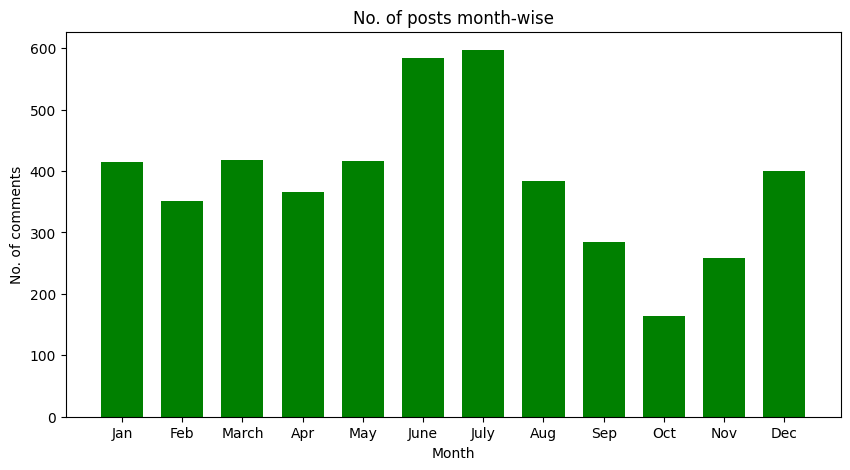

In [75]:
import numpy as np 
import matplotlib.pyplot as plt 


data = {'Jan':414, 'Feb':351, 'March':418, 'Apr':366,'May':417, 'June':584, 'July':597, 'Aug':384,'Sep':285, 'Oct':164, 'Nov':259, 'Dec':400,                                                            } 
Month = list(data.keys()) 
Count = list(data.values()) 

fig = plt.figure(figsize = (10, 5)) 

plt.bar(Month, Count, color ='green', width = 0.7) 

plt.xlabel("Month") 
plt.ylabel("No. of comments") 
plt.title("No. of posts month-wise") 
plt.show() 

In [76]:
df.iloc[:, -3].value_counts()

2    764
4    753
3    732
1    632
5    605
6    587
7    568
Name: Review_Day_of_week, dtype: int64

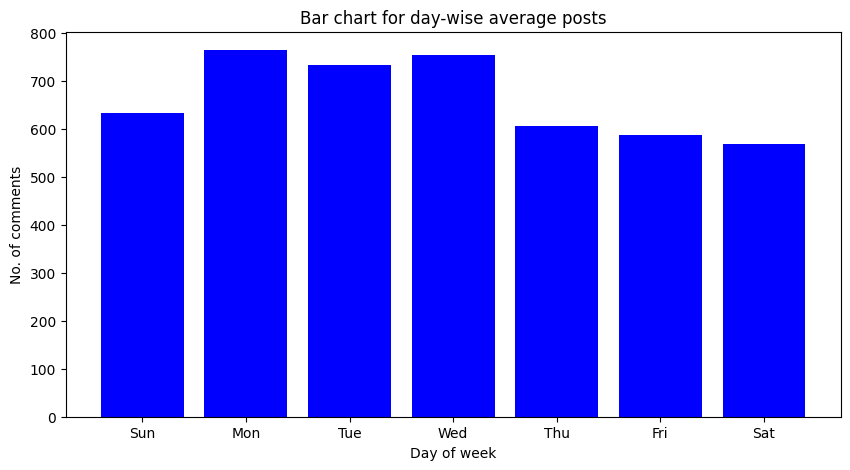

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 

data = {'Sun':632, 'Mon':764, 'Tue':732, 'Wed':753,'Thu':605,'Fri':587,'Sat':568, } 
Day = list(data.keys()) 
Count = list(data.values()) 

fig = plt.figure(figsize = (10, 5)) 
 
plt.bar(Day, Count, color ='blue', width = 0.8) 

plt.xlabel("Day of week") 
plt.ylabel("No. of comments") 
plt.title("Bar chart for day-wise average posts") 
plt.show() 

<AxesSubplot: xlabel='Source'>

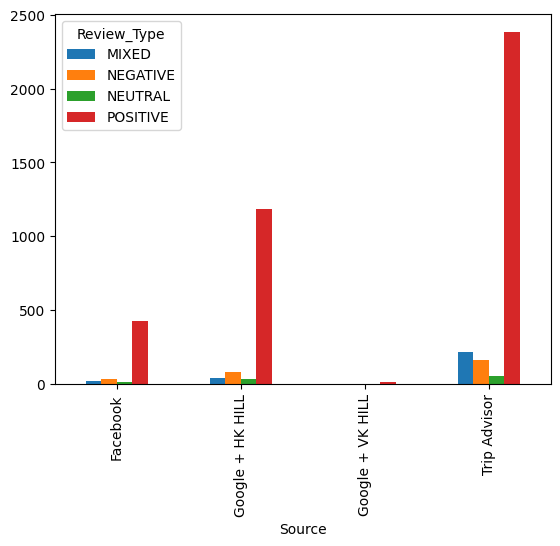

In [80]:
review_type= df.groupby(['Source', 'Review_Type']).Review_Type.count().unstack()
review_type.plot(kind='bar')

In [81]:
df.iloc[:, -1].value_counts()

POSITIVE    4002
MIXED        277
NEGATIVE     270
NEUTRAL       92
Name: Review_Type, dtype: int64

6.4
4.8


<AxesSubplot: ylabel='Review_Type'>

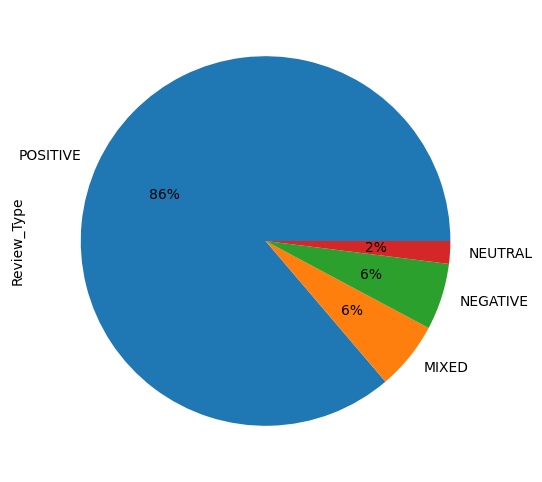

In [82]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])
plot_size[0] = 8
plot_size[1] = 6
df.Review_Type.value_counts().plot(kind='pie', autopct='%1.0f%%')